# Imports

In [124]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx
import osmnx as ox
from pprint import pprint

import pyrosm

In [125]:
# made a new environment, osmnx_env2b

In [126]:
ox.settings.bidirectional_network_types = ["walk", "bike"]
ox.settings.bidirectional_network_types

['walk', 'bike']

# (deprecated) OSMnx network data

In [127]:
# Gb = ox.graph_from_place("Mandaluyong City, Philippines", network_type="bike")
# # Gb = ox.graph_from_place("Mandaluyong City, Philippines", network_type="all_public") # this excludes private ways
# # Gb = ox.graph_from_place("Quezon City, Philippines", network_type="bike")
# fig, ax = ox.plot_graph(Gb)
# plt.show()

In [128]:
# Gw = ox.graph_from_place("Mandaluyong City, Philippines", network_type="walk")
# # Gw = ox.graph_from_place("Quezon City, Philippines", network_type="walk")
# fig, ax = ox.plot_graph(Gw)
# plt.show()

In [129]:
# # geopandas

# # you can convert your graph to node and edge GeoPandas GeoDataFrames
# gb_nodes, gb_edges = ox.graph_to_gdfs(Gb)
# gw_nodes, gw_edges = ox.graph_to_gdfs(Gw)

# gb_edges.head()

# Geofabrik data

In [130]:
folder = "02_outputs/edges_nodes_filtered_final/"

Gb_edges = gpd.read_file(folder + "geofabrik_bike_graph_edges.geojson").set_index(["u", "v", "key"], drop = True)
Gb_nodes = gpd.read_file(folder + "geofabrik_bike_graph_nodes.geojson").set_index("osmid", drop = True)
Gw_edges = gpd.read_file(folder + "geofabrik_walk_graph_edges.geojson").set_index(["u", "v", "key"], drop = True)
Gw_nodes = gpd.read_file(folder + "geofabrik_walk_graph_nodes.geojson").set_index("osmid", drop = True)

In [131]:
Gb_edges.head()

highway lanes  lit maxspeed            name  \
u          v          key                                                    
321734921  26365570   0        primary     2  yes       60  Shaw Boulevard   
           8594662788 0    residential     2  yes     None     Haig Street   
           6320023164 0        primary     2  yes       60  Shaw Boulevard   
26365570   321734921  0        primary     2  yes       60  Shaw Boulevard   
8594662788 5429550720 0    residential     2  yes     None     Haig Street   

                          oneway   ref sidewalk   surface      osmid  ...  \
u          v          key                                             ...   
321734921  26365570   0      yes   141    right   asphalt    4086429  ...   
           8594662788 0     None  None     None  concrete  418206264  ...   
           6320023164 0      yes   141    right   asphalt  575729552  ...   
26365570   321734921  0      yes   141    right   asphalt    4086429  ...   
8594662788 5429550720 0     None  None     None  concrete  418206264  ...   

                           TAG_embankment  TAG_bus:lanes TAG_survey:name  \
u          v          key                                                  
321734921  26365570   0              None           None            None   
           8594662788 0              None           None            None   
           6320023164 0              None           None            None   
26365570   321734921  0              None           None            None   
8594662788 5429550720 0              None           None            None   

                          TAG_source:name:mapillary  TAG_public_transport  \
u          v          key                                                   
321734921  26365570   0                        None                  None   
           8594662788 0                        None                  None   
           6320023164 0                        None                  None   
26365570   321734921  0                        None                  None   
8594662788 5429550720 0                        None                  None   

                          TAG_indoor TAG_width:lanes TAG_barrier:personnel  \
u          v          key                                                    
321734921  26365570   0         None            None                  None   
           8594662788 0         None            None                  None   
           6320023164 0         None            None                  None   
26365570   321734921  0         None            None                  None   
8594662788 5429550720 0         None            None                  None   

                          TAG_bridge:structure  \
u          v          key                        
321734921  26365570   0                   None   
           8594662788 0                   None   
           6320023164 0                   None   
26365570   321734921  0                   None   
8594662788 5429550720 0                   None   

                                                                    geometry  
u          v          key                                                     
321734921  26365570   0    LINESTRING (121.02668 14.59383, 121.02643 14.5...  
           8594662788 0    LINESTRING (121.02668 14.59383, 121.02674 14.5...  
           6320023164 0    LINESTRING (121.02691 14.59376, 121.02668 14.5...  
26365570   321734921  0    LINESTRING (121.02668 14.59383, 121.02643 14.5...  
8594662788 5429550720 0    LINESTRING (121.02674 14.5941, 121.02681 14.59...  

[5 rows x 158 columns]

In [132]:
Gb = ox.graph_from_gdfs(Gb_nodes, Gb_edges)
Gw = ox.graph_from_gdfs(Gw_nodes, Gw_edges)

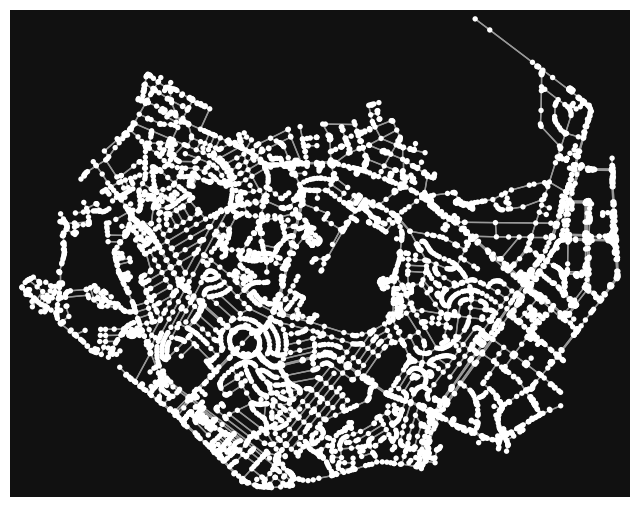

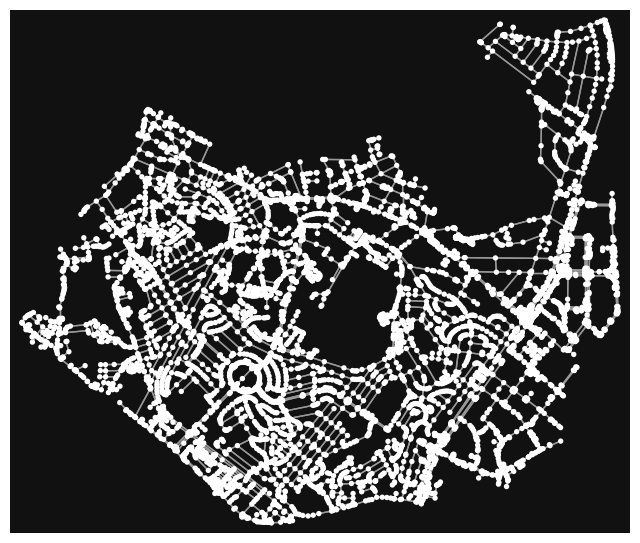

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [133]:
ox.plot_graph(Gb)
ox.plot_graph(Gw)

# CCHAIN data

In [134]:
# adm = pd.read_excel("external_datasets/phl_adminboundaries_tabulardata.xlsx", sheet_name = "ADM4")

# adm.info()

In [135]:
# adm.head()

In [136]:
cchain_poi_amenity = pd.read_csv("provided_datasets/CCHAIN_2024/osm_poi_amenity.csv")

cchain_poi_amenity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7911 entries, 0 to 7910
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   uuid                      7911 non-null   object 
 1   adm4_pcode                7911 non-null   object 
 2   date                      7911 non-null   object 
 3   freq                      7911 non-null   object 
 4   atm_count                 7911 non-null   float64
 5   atm_nearest               7911 non-null   float64
 6   bank_count                7911 non-null   float64
 7   bank_nearest              7911 non-null   float64
 8   college_count             7911 non-null   float64
 9   college_nearest           7911 non-null   float64
 10  community_centre_count    7911 non-null   float64
 11  community_centre_nearest  7911 non-null   float64
 12  convenience_count         7911 non-null   float64
 13  convenience_nearest       7911 non-null   float64
 14  fire_sta

In [137]:
adm_geo_file = "external_datasets/phl_adm_psa_namria_20231106_gdb.gdb.zip"
gpd.list_layers(adm_geo_file)

,name,geometry_type
0,phl_admbndt_adminUnitLookup,None
1,phl_admbnda_adm2_psa_namria_20231106,MultiPolygon
2,phl_admbnda_adm1_psa_namria_20231106,MultiPolygon
3,phl_admbnda_adm0_singlepart_psa_namria_20231106,MultiPolygon
4,phl_admbnda_adm4_psa_namria_20231106,MultiPolygon
5,phl_admbndl_admALL_psa_namria_itos_20231106,MultiLineString
6,phl_admbnda_adm3_psa_namria_20231106,MultiPolygon
7,phl_admbndp_admALL_psa_namria_itos_20231106,Point


In [138]:
adm_geo = gpd.read_file(adm_geo_file, layer = "phl_admbnda_adm4_psa_namria_20231106")

adm_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 42048 entries, 0 to 42047
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   ADM4_EN       42048 non-null  object             
 1   ADM4_PCODE    42048 non-null  object             
 2   ADM4_REF      464 non-null    object             
 3   ADM3_EN       42048 non-null  object             
 4   ADM3_PCODE    42048 non-null  object             
 5   ADM2_EN       42048 non-null  object             
 6   ADM2_PCODE    42048 non-null  object             
 7   ADM1_EN       42048 non-null  object             
 8   ADM1_PCODE    42048 non-null  object             
 9   ADM0_EN       42048 non-null  object             
 10  ADM0_PCODE    42048 non-null  object             
 11  date          42048 non-null  datetime64[ms, UTC]
 12  validOn       42048 non-null  datetime64[ms, UTC]
 13  validTo       0 non-null      datetime64[ms]     
 14

In [139]:
adm_geo.head()

,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Length,Shape_Area,AREA_SQKM,geometry
0,Adams (Pob.),PH0102801001,None,Adams,PH0102801,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,2022-11-09 00:00:00+00:00,2023-11-06 00:00:00+00:00,NaT,0.423604,0.009506,111.143026,"MULTIPOLYGON (((120.92068 18.51462, 120.94626 ..."
1,Bani,PH0102802001,None,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,2022-11-09 00:00:00+00:00,2023-11-06 00:00:00+00:00,NaT,0.054894,0.000150,1.759757,"MULTIPOLYGON (((120.61278 18.2759, 120.61282 1..."
2,Buyon,PH0102802002,None,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,2022-11-09 00:00:00+00:00,2023-11-06 00:00:00+00:00,NaT,0.084185,0.000331,3.872158,"MULTIPOLYGON (((120.62741 18.24638, 120.6337 1..."
3,Cabaruan,PH0102802003,None,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,2022-11-09 00:00:00+00:00,2023-11-06 00:00:00+00:00,NaT,0.071833,0.000255,2.985220,"MULTIPOLYGON (((120.58982 18.26839, 120.60407 ..."
4,Cabulalaan,PH0102802004,None,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,2022-11-09 00:00:00+00:00,2023-11-06 00:00:00+00:00,NaT,0.041478,0.000087,1.017535,"MULTIPOLYGON (((120.58368 18.2821, 120.58401 1..."


In [140]:
adm_geo.loc[adm_geo["ADM4_PCODE"] == "PH0155180160"]

,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Length,Shape_Area,AREA_SQKM,geometry


In [141]:
# This has the old codes, which match the CCHAIN data
# But the most recent adm dataset is best for accuracy
adm_2015 = gpd.read_file("external_datasets/Barangays/Barangays.shp")

adm_2015.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 42058 entries, 0 to 42057
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ADM1_PCODE  42058 non-null  object  
 1   ADM1_EN     42058 non-null  object  
 2   ADM2_PCODE  42058 non-null  object  
 3   ADM2_EN     42058 non-null  object  
 4   ADM3_PCODE  42058 non-null  object  
 5   ADM3_EN     42058 non-null  object  
 6   ADM4_PCODE  42036 non-null  object  
 7   ADM4_EN     42058 non-null  object  
 8   geometry    42058 non-null  geometry
dtypes: geometry(1), object(8)
memory usage: 2.9+ MB


In [142]:
adm_2015.head()

,ADM1_PCODE,ADM1_EN,ADM2_PCODE,ADM2_EN,ADM3_PCODE,ADM3_EN,ADM4_PCODE,ADM4_EN,geometry
0,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502012,Pogomboa,"POLYGON ((120.25441 15.88112, 120.24723 15.878..."
1,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502013,Pogonsili,"POLYGON ((120.26372 15.81724, 120.25821 15.811..."
2,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502014,San Jose,"POLYGON ((120.28018 15.87048, 120.27885 15.870..."
3,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502016,Tampac,"POLYGON ((120.26163 15.876, 120.26149 15.87597..."
4,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502017,Laoag,"POLYGON ((120.221 15.88999, 120.22163 15.88672..."


In [143]:
adm_2015.loc[adm_2015["ADM4_PCODE"] == "PH015518016"]

,ADM1_PCODE,ADM1_EN,ADM2_PCODE,ADM2_EN,ADM3_PCODE,ADM3_EN,ADM4_PCODE,ADM4_EN,geometry
953,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015518000,DAGUPAN CITY,PH015518016,Lomboy,"POLYGON ((120.32719 16.0531, 120.32189 16.0504..."


## Try converting the old codes in cchain to new codes

Decision: leave this for later

In [144]:
df = adm_geo[["ADM2_PCODE", "ADM2_EN"]].drop_duplicates(keep = "first")
df["ADM2_EN"] = df["ADM2_EN"].str.upper()
df["ADM2_PCODE"] = df["ADM2_PCODE"].str[4:7]

df

,ADM2_PCODE,ADM2_EN
0,028,ILOCOS NORTE
559,029,ILOCOS SUR
1327,033,LA UNION
1903,055,PANGASINAN
3267,009,BATANES
...,...,...
40827,066,SULU
41237,070,TAWI-TAWI
41440,087,MAGUINDANAO DEL NORTE
41698,088,MAGUINDANAO DEL SUR


In [145]:
df.loc[df["ADM2_EN"].str.contains("Zamboanga", case = False)]

,ADM2_PCODE,ADM2_EN
27593,072,ZAMBOANGA DEL NORTE
28284,073,ZAMBOANGA DEL SUR
29066,083,ZAMBOANGA SIBUGAY


In [146]:
df2 = adm_2015[["ADM2_PCODE", "ADM2_EN"]].drop_duplicates(keep = "first")

df2["ADM2_PCODE"] = df2["ADM2_PCODE"].str[4:6]

df2

,ADM2_PCODE,ADM2_EN
0,55,PANGASINAN
31,29,ILOCOS SUR
232,33,LA UNION
2242,28,ILOCOS NORTE
3265,31,ISABELA
...,...,...
39765,59,ROMBLON
39793,51,OCCIDENTAL MINDORO
40148,40,MARINDUQUE
40839,45,NEGROS OCCIDENTAL


In [147]:
df2.max()

ADM2_PCODE                   98
ADM2_EN       ZAMBOANGA SIBUGAY
dtype: object

In [148]:
cross_reference = pd.merge(df, df2, on = "ADM2_EN", how = "outer", suffixes = ("_new", "_old"))

cross_reference.head()

,ADM2_PCODE_new,ADM2_EN,ADM2_PCODE_old
0,001,ABRA,01
1,002,AGUSAN DEL NORTE,02
2,003,AGUSAN DEL SUR,03
3,004,AKLAN,04
4,005,ALBAY,05


In [149]:
cross_reference.loc[cross_reference["ADM2_PCODE_new"].isna() | cross_reference["ADM2_PCODE_old"].isna()]

,ADM2_PCODE_new,ADM2_EN,ADM2_PCODE_old
25,097,CITY OF ISABELA (NOT A PROVINCE),NaN
26,NaN,CITY OF ISABELA (Not a Province),97
27,NaN,COMPOSTELA VALLEY,82
29,NaN,COTABATO CITY (Not a Province),98
30,082,DAVAO DE ORO (COMPOSTELA VALLEY),NaN
49,NaN,MAGUINDANAO,38
50,087,MAGUINDANAO DEL NORTE,NaN
51,088,MAGUINDANAO DEL SUR,NaN
54,039,METROPOLITAN MANILA FIRST DISTRICT,NaN
55,076,METROPOLITAN MANILA FOURTH DISTRICT,NaN


In [150]:
cross_reference.loc[cross_reference["ADM2_EN"].str.contains("cotabato", case = False)]

,ADM2_PCODE_new,ADM2_EN,ADM2_PCODE_old
28,047,COTABATO (NORTH COTABATO),47
29,NaN,COTABATO CITY (Not a Province),98
83,063,SOUTH COTABATO,63


## Check available barangays

In [151]:
cchain_filenames = ["osm_poi_amenity.csv", "osm_poi_health.csv", "project_noah_hazards.csv", "tm_open_buildings.csv",
                    # "nighttime_lights.csv", # Removed this because turns out its not about street lights
                    "google_open_buildings.csv", "climate_air_quality.csv", "brgy_geography.csv"]

In [152]:
check_barangays = False

if check_barangays:

    for cchain_filename in cchain_filenames:
        print(cchain_filename)
        cchain_df = pd.read_csv(f"provided_datasets/CCHAIN_2024/{cchain_filename}")
        merged = pd.merge(cchain_df, adm_2015, left_on = "adm4_pcode", right_on = "ADM4_PCODE", how = "left")

        no_match = merged.loc[merged["ADM4_PCODE"].isna()].shape[0]
        print(f"Number of rows in file with no match in ADM 2015: {no_match}\n")

        df = merged.loc[
            # merged["ADM1_EN"] == "NATIONAL CAPITAL REGION (NCR)",
            merged["ADM2_EN"].str.contains("NCR", case = False).fillna(False),
            ["ADM1_EN", "ADM2_EN", "ADM3_EN", "ADM4_EN"]
        ]

        print(df["ADM3_EN"].value_counts())
        print("\n")

In [153]:
# Example: amenity dataset
merged = pd.merge(cchain_poi_amenity, adm_2015, left_on = "adm4_pcode", right_on = "ADM4_PCODE", how = "left")

merged.head()

,uuid,adm4_pcode,date,freq,atm_count,atm_nearest,bank_count,bank_nearest,college_count,college_nearest,...,university_nearest,ADM1_PCODE,ADM1_EN,ADM2_PCODE,ADM2_EN,ADM3_PCODE,ADM3_EN,ADM4_PCODE,ADM4_EN,geometry
0,OSMPA000000,PH015518016,2018-01-01,Y,0.0,10000.0,0.0,1343.849031,0.0,10000.0,...,10000.0,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015518000,DAGUPAN CITY,PH015518016,Lomboy,"POLYGON ((120.32719 16.0531, 120.32189 16.0504..."
1,OSMPA000001,PH015518031,2018-01-01,Y,0.0,10000.0,5.0,0.000000,0.0,10000.0,...,10000.0,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015518000,DAGUPAN CITY,PH015518031,Tapuac,"POLYGON ((120.33389 16.03978, 120.33375 16.039..."
2,OSMPA000002,PH015518022,2018-01-01,Y,0.0,10000.0,5.0,0.000000,0.0,10000.0,...,10000.0,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015518000,DAGUPAN CITY,PH015518022,Pantal,"POLYGON ((120.34761 16.06, 120.34752 16.05993,..."
3,OSMPA000003,PH015518024,2018-01-01,Y,0.0,10000.0,9.0,0.000000,0.0,10000.0,...,10000.0,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015518000,DAGUPAN CITY,PH015518024,Barangay I (T. Bugallon),"POLYGON ((120.34054 16.04486, 120.34058 16.044..."
4,OSMPA000004,PH034919017,2018-01-01,Y,0.0,10000.0,0.0,10000.000000,0.0,10000.0,...,10000.0,PH030000000,REGION III (CENTRAL LUZON),PH034900000,NUEVA ECIJA,PH034919000,PALAYAN CITY (Capital),PH034919017,Imelda Valley,"POLYGON ((121.12687 15.57948, 121.1361 15.5792..."


In [154]:
# Rows in cchain that didnt find any match with ADM 
merged.loc[merged["ADM4_PCODE"].isna()].shape

(36, 47)

In [155]:
merged[["ADM1_EN", "ADM2_EN", "ADM3_EN", "ADM4_EN"]]

,ADM1_EN,ADM2_EN,ADM3_EN,ADM4_EN
0,REGION I (ILOCOS REGION),PANGASINAN,DAGUPAN CITY,Lomboy
1,REGION I (ILOCOS REGION),PANGASINAN,DAGUPAN CITY,Tapuac
2,REGION I (ILOCOS REGION),PANGASINAN,DAGUPAN CITY,Pantal
3,REGION I (ILOCOS REGION),PANGASINAN,DAGUPAN CITY,Barangay I (T. Bugallon)
4,REGION III (CENTRAL LUZON),NUEVA ECIJA,PALAYAN CITY (Capital),Imelda Valley
...,...,...,...,...
7906,NATIONAL CAPITAL REGION (NCR),"NCR, SECOND DISTRICT (Not a Province)",CITY OF MANDALUYONG,Namayan
7907,NATIONAL CAPITAL REGION (NCR),"NCR, SECOND DISTRICT (Not a Province)",CITY OF MANDALUYONG,Plainview
7908,NATIONAL CAPITAL REGION (NCR),"NCR, THIRD DISTRICT (Not a Province)",CITY OF NAVOTAS,Navotas West
7909,NATIONAL CAPITAL REGION (NCR),"NCR, THIRD DISTRICT (Not a Province)",CITY OF NAVOTAS,Tanza


In [156]:
merged["ADM2_EN"].value_counts()

ADM2_EN
DAVAO DEL SUR                            1638
ILOILO                                   1620
LEYTE                                    1242
ZAMBOANGA DEL SUR                         882
MISAMIS ORIENTAL                          720
ALBAY                                     630
PANGASINAN                                279
CEBU                                      243
NCR, SECOND DISTRICT (Not a Province)     243
NUEVA ECIJA                               171
NCR, THIRD DISTRICT (Not a Province)      126
NCR, FOURTH DISTRICT (Not a Province)      81
Name: count, dtype: int64

In [157]:
df = merged.loc[
    # merged["ADM1_EN"] == "NATIONAL CAPITAL REGION (NCR)",
    merged["ADM2_EN"].str.contains("NCR", case = False).fillna(False),
    ["ADM1_EN", "ADM2_EN", "ADM3_EN", "ADM4_EN"]
]

df

/var/folders/dx/zl2lgn4d3dg2zvm7jcxmbdzm0000gn/T/ipykernel_35596/4177246100.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged["ADM2_EN"].str.contains("NCR", case = False).fillna(False),


,ADM1_EN,ADM2_EN,ADM3_EN,ADM4_EN
127,NATIONAL CAPITAL REGION (NCR),"NCR, SECOND DISTRICT (Not a Province)",CITY OF MANDALUYONG,Wack-wack Greenhills
128,NATIONAL CAPITAL REGION (NCR),"NCR, SECOND DISTRICT (Not a Province)",CITY OF MANDALUYONG,Daang Bakal
129,NATIONAL CAPITAL REGION (NCR),"NCR, SECOND DISTRICT (Not a Province)",CITY OF MANDALUYONG,Pleasant Hills
130,NATIONAL CAPITAL REGION (NCR),"NCR, SECOND DISTRICT (Not a Province)",CITY OF MANDALUYONG,Barangka Ibaba
131,NATIONAL CAPITAL REGION (NCR),"NCR, SECOND DISTRICT (Not a Province)",CITY OF MANDALUYONG,Barangka Ilaya
...,...,...,...,...
7906,NATIONAL CAPITAL REGION (NCR),"NCR, SECOND DISTRICT (Not a Province)",CITY OF MANDALUYONG,Namayan
7907,NATIONAL CAPITAL REGION (NCR),"NCR, SECOND DISTRICT (Not a Province)",CITY OF MANDALUYONG,Plainview
7908,NATIONAL CAPITAL REGION (NCR),"NCR, THIRD DISTRICT (Not a Province)",CITY OF NAVOTAS,Navotas West
7909,NATIONAL CAPITAL REGION (NCR),"NCR, THIRD DISTRICT (Not a Province)",CITY OF NAVOTAS,Tanza


In [158]:
df["ADM3_EN"].value_counts()

ADM3_EN
CITY OF MANDALUYONG    243
CITY OF NAVOTAS        126
CITY OF MUNTINLUPA      81
Name: count, dtype: int64

## Use location.csv

In [159]:
location = pd.read_csv("provided_datasets/CCHAIN_2024/location.csv").drop("Unnamed: 0", axis = 1)

location.head()

,adm1_en,adm1_pcode,adm2_en,adm2_pcode,adm3_en,adm3_pcode,adm4_en,adm4_pcode,brgy_total_area
0,Region I,PH010000000,Pangasinan,PH015500000,Dagupan City,PH015518000,Lomboy,PH015518016,1.0216
1,Region I,PH010000000,Pangasinan,PH015500000,Dagupan City,PH015518000,Tapuac,PH015518031,1.0440
2,Region I,PH010000000,Pangasinan,PH015500000,Dagupan City,PH015518000,Pantal,PH015518022,3.2625
3,Region I,PH010000000,Pangasinan,PH015500000,Dagupan City,PH015518000,Barangay I (T. Bugallon),PH015518024,0.1814
4,Region III,PH030000000,Nueva Ecija,PH034900000,Palayan City,PH034919000,Imelda Valley,PH034919017,6.3369


In [160]:
check_barangays_2 = False

if check_barangays_2:

    for cchain_filename in cchain_filenames:
        print(cchain_filename)
        cchain_df = pd.read_csv(f"provided_datasets/CCHAIN_2024/{cchain_filename}")
        merged = pd.merge(cchain_df, location, left_on = "adm4_pcode", right_on = "adm4_pcode", how = "left")

        no_match = merged.loc[merged["adm4_pcode"].isna()].shape[0]
        print(f"Number of rows in file with no match in location.csv: {no_match}\n")

        df = merged.loc[
            # merged["ADM1_EN"] == "NATIONAL CAPITAL REGION (NCR)",
            merged["adm2_en"].str.contains("NCR", case = False).fillna(False),
            ["adm1_en", "adm2_en", "adm3_en", "adm4_en"]
        ]

        print(df["adm3_en"].value_counts())
        print("\n")

In [161]:
# issue:
# tm_open_buildings.csv
# Number of rows in file with no match in location.csv: 32

cchain_filename = "tm_open_buildings.csv"
print(cchain_filename)
cchain_df = pd.read_csv(f"provided_datasets/CCHAIN_2024/{cchain_filename}")
merged = pd.merge(cchain_df, location, left_on = "adm4_pcode", right_on = "adm4_pcode", how = "left")

no_match = merged.loc[merged["adm4_pcode"].isna()].shape[0]
print(f"Number of rows in file with no match in location.csv: {no_match}\n")

df = merged.loc[
    # merged["ADM1_EN"] == "NATIONAL CAPITAL REGION (NCR)",
    merged["adm2_en"].str.contains("NCR", case = False).fillna(False),
    ["adm1_en", "adm2_en", "adm3_en", "adm4_en"]
]

print(df["adm3_en"].value_counts())
print("\n")

tm_open_buildings.csv
Number of rows in file with no match in location.csv: 32

adm3_en
City of Muntinlupa     1263
City of Mandaluyong     543
City of Navotas         200
Name: count, dtype: int64




/var/folders/dx/zl2lgn4d3dg2zvm7jcxmbdzm0000gn/T/ipykernel_35596/7593505.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged["adm2_en"].str.contains("NCR", case = False).fillna(False),


In [162]:
merged["settlement_type"].value_counts()

settlement_type
settlement       11631
nonsettlement      738
Name: count, dtype: int64

In [163]:
merged.loc[merged["adm4_pcode"].isna()].head()

,adm3_pcode_x,adm4_pcode,tile_id,osm_id,settlement_type,roof_material,roof_layout,roof_area,is_gated,density,height,geometry,adm1_en,adm1_pcode,adm2_en,adm2_pcode,adm3_en,adm3_pcode_y,adm4_en,brgy_total_area
12337,NaN,NaN,T00043,938230281,settlement,natural-gi-mixed,single-layer-basic,20.2,False,single,NaN,"POLYGON ((121.051953189913 14.4362095094218,12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12338,NaN,NaN,T00043,938230285,settlement,natural-gi-mixed,single-layer-basic,11.2,False,single,NaN,"POLYGON ((121.052106389913 14.4363011094219,12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12339,NaN,NaN,T00043,938230286,settlement,natural-gi-mixed,single-layer-basic,27.4,False,single,NaN,"POLYGON ((121.052187889913 14.436322009422,121...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12340,NaN,NaN,T00043,938230351,settlement,natural-gi-mixed,single-layer-basic,21.5,False,single,NaN,"POLYGON ((121.052356689914 14.4367381094223,12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12341,NaN,NaN,T00043,938230352,settlement,natural-gi-mixed,single-layer-basic,17.9,False,single,NaN,"POLYGON ((121.052343589914 14.4367071094223,12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filter to chosen city

In [164]:
location.head()

,adm1_en,adm1_pcode,adm2_en,adm2_pcode,adm3_en,adm3_pcode,adm4_en,adm4_pcode,brgy_total_area
0,Region I,PH010000000,Pangasinan,PH015500000,Dagupan City,PH015518000,Lomboy,PH015518016,1.0216
1,Region I,PH010000000,Pangasinan,PH015500000,Dagupan City,PH015518000,Tapuac,PH015518031,1.0440
2,Region I,PH010000000,Pangasinan,PH015500000,Dagupan City,PH015518000,Pantal,PH015518022,3.2625
3,Region I,PH010000000,Pangasinan,PH015500000,Dagupan City,PH015518000,Barangay I (T. Bugallon),PH015518024,0.1814
4,Region III,PH030000000,Nueva Ecija,PH034900000,Palayan City,PH034919000,Imelda Valley,PH034919017,6.3369


In [165]:
city_adm3_en = "City of Mandaluyong"

location.loc[location["adm3_en"] == city_adm3_en].head()

,adm1_en,adm1_pcode,adm2_en,adm2_pcode,adm3_en,adm3_pcode,adm4_en,adm4_pcode,brgy_total_area
127,National Capital Region,PH130000000,"NCR, Second District",PH137400000,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2.8749
128,National Capital Region,PH130000000,"NCR, Second District",PH137400000,City of Mandaluyong,PH137401000,Daang Bakal,PH137401009,0.1731
129,National Capital Region,PH130000000,"NCR, Second District",PH137400000,City of Mandaluyong,PH137401000,Pleasant Hills,PH137401023,0.2070
130,National Capital Region,PH130000000,"NCR, Second District",PH137400000,City of Mandaluyong,PH137401000,Barangka Ibaba,PH137401004,0.1599
131,National Capital Region,PH130000000,"NCR, Second District",PH137400000,City of Mandaluyong,PH137401000,Barangka Ilaya,PH137401005,0.4823


In [166]:
city_adm3_pcode = "PH137401000"

city_initial_digits = "PH137401"

In [167]:
cchain_df

,adm3_pcode,adm4_pcode,tile_id,osm_id,settlement_type,roof_material,roof_layout,roof_area,is_gated,density,height,geometry
0,PH015518000,PH015518022,T00005,317043667,nonsettlement,NaN,NaN,575.6,False,single,low,"POLYGON ((120.330493190585 16.0454645098642,12..."
1,PH015518000,PH015518022,T00005,317043688,settlement,natural-gi-mixed,single-layer-basic,123.2,False,single,NaN,"POLYGON ((120.330027290585 16.0460482098641,12..."
2,PH015518000,PH015518022,T00005,317043691,settlement,natural-gi-mixed,single-layer-basic,228.6,False,single,NaN,"POLYGON ((120.329877890585 16.045881409864,120..."
3,PH015518000,PH015518022,T00005,317043692,settlement,natural-gi-mixed,single-layer-basic,166.7,False,single,NaN,"POLYGON ((120.330875390585 16.0453093098643,12..."
4,PH015518000,PH015518022,T00005,317043698,settlement,natural-gi-mixed,single-layer-basic,90.2,False,single,NaN,"POLYGON ((120.330967290585 16.0452796098644,12..."
...,...,...,...,...,...,...,...,...,...,...,...,...
12364,NaN,NaN,T00043,1226151974,settlement,natural-gi-mixed,single-layer-basic,19.2,False,single,NaN,"POLYGON ((121.052340389914 14.4367597094223,12..."
12365,NaN,NaN,T00043,1226151978,settlement,natural-gi-mixed,single-layer-basic,10.8,False,single,NaN,"POLYGON ((121.052123789914 14.4368222094223,12..."
12366,NaN,NaN,T00043,1226151982,settlement,natural-gi-mixed,single-layer-basic,14.9,False,single,NaN,"POLYGON ((121.052167789914 14.4367199094222,12..."
12367,NaN,NaN,T00043,1226151998,settlement,natural-gi-mixed,single-layer-basic,11.4,False,single,NaN,"POLYGON ((121.052150389914 14.4368192094223,12..."


In [168]:
location

,adm1_en,adm1_pcode,adm2_en,adm2_pcode,adm3_en,adm3_pcode,adm4_en,adm4_pcode,brgy_total_area
0,Region I,PH010000000,Pangasinan,PH015500000,Dagupan City,PH015518000,Lomboy,PH015518016,1.0216
1,Region I,PH010000000,Pangasinan,PH015500000,Dagupan City,PH015518000,Tapuac,PH015518031,1.0440
2,Region I,PH010000000,Pangasinan,PH015500000,Dagupan City,PH015518000,Pantal,PH015518022,3.2625
3,Region I,PH010000000,Pangasinan,PH015500000,Dagupan City,PH015518000,Barangay I (T. Bugallon),PH015518024,0.1814
4,Region III,PH030000000,Nueva Ecija,PH034900000,Palayan City,PH034919000,Imelda Valley,PH034919017,6.3369
...,...,...,...,...,...,...,...,...,...
874,National Capital Region,PH130000000,"NCR, Second District",PH137400000,City of Mandaluyong,PH137401000,Namayan,PH137401018,0.3856
875,National Capital Region,PH130000000,"NCR, Second District",PH137400000,City of Mandaluyong,PH137401000,Plainview,PH137401022,1.0839
876,National Capital Region,PH130000000,"NCR, Third District",PH137500000,City of Navotas,PH137503000,Navotas West,PH137503007,0.0581
877,National Capital Region,PH130000000,"NCR, Third District",PH137500000,City of Navotas,PH137503000,Tanza,PH137503014,5.7566


In [169]:
cchain_filtered = dict()

for cchain_filename in cchain_filenames:
        print(cchain_filename)
        cchain_df = pd.read_csv(f"provided_datasets/CCHAIN_2024/{cchain_filename}")
        merged = pd.merge(cchain_df, location, left_on = "adm4_pcode", right_on = "adm4_pcode", how = "left")

        cchain_filtered[cchain_filename] = merged.loc[merged["adm4_pcode"].str.startswith(city_initial_digits).fillna(False)].copy(deep = True)

osm_poi_amenity.csv
osm_poi_health.csv
project_noah_hazards.csv
tm_open_buildings.csv


/var/folders/dx/zl2lgn4d3dg2zvm7jcxmbdzm0000gn/T/ipykernel_35596/3928095365.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cchain_filtered[cchain_filename] = merged.loc[merged["adm4_pcode"].str.startswith(city_initial_digits).fillna(False)].copy(deep = True)


google_open_buildings.csv
climate_air_quality.csv
brgy_geography.csv


In [170]:
for key, df in cchain_filtered.items():
    print(key)
    pprint(df.columns.to_list())
    print("\n------")

osm_poi_amenity.csv
['uuid',
 'adm4_pcode',
 'date',
 'freq',
 'atm_count',
 'atm_nearest',
 'bank_count',
 'bank_nearest',
 'college_count',
 'college_nearest',
 'community_centre_count',
 'community_centre_nearest',
 'convenience_count',
 'convenience_nearest',
 'fire_station_count',
 'fire_station_nearest',
 'kindergarten_count',
 'kindergarten_nearest',
 'lighthouse_count',
 'lighthouse_nearest',
 'market_place_count',
 'market_place_nearest',
 'park_count',
 'park_nearest',
 'police_count',
 'police_nearest',
 'school_count',
 'school_nearest',
 'shelter_count',
 'shelter_nearest',
 'supermarket_count',
 'supermarket_nearest',
 'telephone_count',
 'telephone_nearest',
 'town_hall_count',
 'town_hall_nearest',
 'university_count',
 'university_nearest',
 'adm1_en',
 'adm1_pcode',
 'adm2_en',
 'adm2_pcode',
 'adm3_en',
 'adm3_pcode',
 'adm4_en',
 'brgy_total_area']

------
osm_poi_health.csv
['uuid',
 'adm4_pcode',
 'date',
 'freq',
 'clinic_count',
 'clinic_nearest',
 'dentist_coun

## Prepare to merge

In [171]:
pprint(list(cchain_filtered.keys()))

['osm_poi_amenity.csv',
 'osm_poi_health.csv',
 'project_noah_hazards.csv',
 'tm_open_buildings.csv',
 'google_open_buildings.csv',
 'climate_air_quality.csv',
 'brgy_geography.csv']


In [172]:
assumed_crs = "4326"

In [173]:
brgy_geo = gpd.GeoDataFrame(cchain_filtered["brgy_geography.csv"])

brgy_geo["geometry"] = gpd.GeoSeries.from_wkt(brgy_geo["geometry"])
brgy_geo = brgy_geo.set_geometry("geometry").set_crs(epsg = assumed_crs)
# I'm just assuming this is the correct CRS

brgy_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 27 entries, 607 to 633
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   uuid                    27 non-null     object  
 1   adm4_pcode              27 non-null     object  
 2   date                    27 non-null     object  
 3   freq                    27 non-null     object  
 4   brgy_total_area_x       27 non-null     float64 
 5   brgy_distance_to_coast  27 non-null     float64 
 6   brgy_is_coastal         27 non-null     bool    
 7   geometry                27 non-null     geometry
 8   adm1_en                 27 non-null     object  
 9   adm1_pcode              27 non-null     object  
 10  adm2_en                 27 non-null     object  
 11  adm2_pcode              27 non-null     object  
 12  adm3_en                 27 non-null     object  
 13  adm3_pcode              27 non-null     object  
 14  adm4_en               

In [174]:
brgy_geo.iloc[0:3]

,uuid,adm4_pcode,date,freq,brgy_total_area_x,brgy_distance_to_coast,brgy_is_coastal,geometry,adm1_en,adm1_pcode,adm2_en,adm2_pcode,adm3_en,adm3_pcode,adm4_en,brgy_total_area_y
607,BGEOG00025F,PH137401027,2003-01-01,S,2.8749,7323.950570,False,"POLYGON ((121.05959 14.60027, 121.05965 14.599...",National Capital Region,PH130000000,"NCR, Second District",PH137400000,City of Mandaluyong,PH137401000,Wack-wack Greenhills,2.8749
608,BGEOG000260,PH137401009,2003-01-01,S,0.1731,5434.109831,False,"POLYGON ((121.02966 14.59473, 121.02973 14.594...",National Capital Region,PH130000000,"NCR, Second District",PH137400000,City of Mandaluyong,PH137401000,Daang Bakal,0.1731
609,BGEOG000261,PH137401023,2003-01-01,S,0.2070,6471.590840,False,"POLYGON ((121.04489 14.58798, 121.04636 14.587...",National Capital Region,PH130000000,"NCR, Second District",PH137400000,City of Mandaluyong,PH137401000,Pleasant Hills,0.2070


In [175]:
brgy_geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [176]:
brgy_geo_to_merge = brgy_geo[["geometry", "adm4_pcode", "adm4_en"]].rename({"adm4_pcode": "CCHAIN_adm4_pcode", "adm4_en": "CCHAIN_adm4_en"}, axis = 1)

brgy_geo_to_merge.head()

,geometry,CCHAIN_adm4_pcode,CCHAIN_adm4_en
607,"POLYGON ((121.05959 14.60027, 121.05965 14.599...",PH137401027,Wack-wack Greenhills
608,"POLYGON ((121.02966 14.59473, 121.02973 14.594...",PH137401009,Daang Bakal
609,"POLYGON ((121.04489 14.58798, 121.04636 14.587...",PH137401023,Pleasant Hills
610,"POLYGON ((121.04073 14.57289, 121.0408 14.5726...",PH137401004,Barangka Ibaba
611,"POLYGON ((121.05112 14.5741, 121.05148 14.5736...",PH137401005,Barangka Ilaya


In [177]:
gw_nodes_with_brgy_code = Gw_nodes.sjoin(
    brgy_geo_to_merge,
    how = "left",
    predicate = "intersects"
).drop("index_right", axis = 1) # byproduct of sjoin operation

assert all(gw_nodes_with_brgy_code["CCHAIN_adm4_pcode"].str.startswith(city_initial_digits))

gw_nodes_with_brgy_code.head()

,visible,changeset,x,y,version,timestamp,tags,HAS_TAG,TAG_access,TAG_barrier,...,TAG_survey:name,TAG_fee,TAG_traffic_calming:direction,TAG_railway,TAG_motor_vehicle,TAG_description,TAG_layer,geometry,CCHAIN_adm4_pcode,CCHAIN_adm4_en
osmid,,,,,,,,,,,,,,,,,,,,,
321734921,False,0,121.026680,14.593833,19,1720619400,None,False,None,None,...,None,None,None,None,None,None,None,POINT (121.02668 14.59383),PH137401009,Daang Bakal
26365570,False,0,121.026428,14.593916,19,1638344382,None,False,None,None,...,None,None,None,None,None,None,None,POINT (121.02643 14.59392),PH137401009,Daang Bakal
8594662788,False,0,121.026741,14.594100,2,1679034468,"{ ""access"": ""permissive"", ""barrier"": ""gate"" }",True,permissive,gate,...,None,None,None,None,None,None,None,POINT (121.02674 14.5941),PH137401009,Daang Bakal
6320023164,False,0,121.026909,14.593757,8,1720619400,"{ ""crossing"": ""marked"", ""crossing:markings"": ""...",True,None,None,...,None,None,None,None,None,None,None,POINT (121.02691 14.59376),PH137401009,Daang Bakal
88776956,False,0,121.050064,14.575985,28,1513382269,None,False,None,None,...,None,None,None,None,None,None,None,POINT (121.05006 14.57598),PH137401005,Barangka Ilaya


In [178]:
gb_nodes_with_brgy_code = Gb_nodes.sjoin(
    brgy_geo_to_merge,
    how = "left",
    predicate = "intersects"
).drop("index_right", axis = 1) # byproduct of sjoin operation

assert all(gb_nodes_with_brgy_code["CCHAIN_adm4_pcode"].str.startswith(city_initial_digits))

gb_nodes_with_brgy_code.head()

,visible,changeset,x,y,version,timestamp,tags,HAS_TAG,TAG_access,TAG_barrier,...,TAG_covered,TAG_survey:name,TAG_fee,TAG_traffic_calming:direction,TAG_motor_vehicle,TAG_description,TAG_layer,geometry,CCHAIN_adm4_pcode,CCHAIN_adm4_en
osmid,,,,,,,,,,,,,,,,,,,,,
321734921,False,0,121.026680,14.593833,19,1720619400,None,False,None,None,...,None,None,None,None,None,None,None,POINT (121.02668 14.59383),PH137401009,Daang Bakal
26365570,False,0,121.026428,14.593916,19,1638344382,None,False,None,None,...,None,None,None,None,None,None,None,POINT (121.02643 14.59392),PH137401009,Daang Bakal
8594662788,False,0,121.026741,14.594100,2,1679034468,"{ ""access"": ""permissive"", ""barrier"": ""gate"" }",True,permissive,gate,...,None,None,None,None,None,None,None,POINT (121.02674 14.5941),PH137401009,Daang Bakal
6320023164,False,0,121.026909,14.593757,8,1720619400,"{ ""crossing"": ""marked"", ""crossing:markings"": ""...",True,None,None,...,None,None,None,None,None,None,None,POINT (121.02691 14.59376),PH137401009,Daang Bakal
25583974,False,0,121.031441,14.570280,12,1718661935,None,False,None,None,...,None,None,None,None,None,None,None,POINT (121.03144 14.57028),PH137401014,Hulo


In [179]:
gw_nodes_with_brgy_code.index.to_series().value_counts().max() # Should be 1

np.int64(1)

In [180]:
gb_nodes_with_brgy_code.index.to_series().value_counts().max() # Should be 1

np.int64(1)

In [181]:
# from here, merging with CCHAIN on adm4 is trivial
# not doing it yet because of memory cost

# air quality CCHAIN (ignore)

In [182]:
cchain_filtered.keys()

dict_keys(['osm_poi_amenity.csv', 'osm_poi_health.csv', 'project_noah_hazards.csv', 'tm_open_buildings.csv', 'google_open_buildings.csv', 'climate_air_quality.csv', 'brgy_geography.csv'])

In [183]:
cchain_filtered["climate_air_quality.csv"].head()

,uuid,adm4_pcode,date,freq,no2,co,so2,o3,pm10,pm25,adm1_en,adm1_pcode,adm2_en,adm2_pcode,adm3_en,adm3_pcode,adm4_en,brgy_total_area
6055016,CAIRQ5C6468,PH137401001,2003-01-02,D,1.70,0.1399,1.61,38.97,35.36,22.39,National Capital Region,PH130000000,"NCR, Second District",PH137400000,City of Mandaluyong,PH137401000,Addition Hills,1.167
6055017,CAIRQ5C6469,PH137401001,2003-01-03,D,2.97,0.1459,2.07,38.45,44.01,29.68,National Capital Region,PH130000000,"NCR, Second District",PH137400000,City of Mandaluyong,PH137401000,Addition Hills,1.167
6055018,CAIRQ5C646A,PH137401001,2003-01-04,D,2.05,0.1396,1.77,38.23,30.29,19.56,National Capital Region,PH130000000,"NCR, Second District",PH137400000,City of Mandaluyong,PH137401000,Addition Hills,1.167
6055019,CAIRQ5C646B,PH137401001,2003-01-05,D,1.66,0.1426,1.44,39.54,37.43,22.90,National Capital Region,PH130000000,"NCR, Second District",PH137400000,City of Mandaluyong,PH137401000,Addition Hills,1.167
6055020,CAIRQ5C646C,PH137401001,2003-01-06,D,1.61,0.1246,1.31,40.44,31.17,19.25,National Capital Region,PH130000000,"NCR, Second District",PH137400000,City of Mandaluyong,PH137401000,Addition Hills,1.167


In [184]:
cchain_filtered["climate_air_quality.csv"]["freq"].value_counts()

freq
D    197235
Name: count, dtype: int64

In [185]:
cchain_filtered["climate_air_quality.csv"]["date"].min()

'2003-01-01'

In [186]:
cchain_filtered["climate_air_quality.csv"]["date"].max()

'2022-12-31'

In [187]:
cchain_filtered["climate_air_quality.csv"]["adm4_en"].value_counts(ascending = False, dropna = False)

adm4_en
Addition Hills          7305
Mabini-J. Rizal         7305
Vergara                 7305
San Jose                7305
Poblacion               7305
Pleasant Hills          7305
Plainview               7305
Pag-asa                 7305
Old Zañiga              7305
New Zañiga              7305
Namayan                 7305
Mauway                  7305
Malamig                 7305
Hulo                    7305
Bagong Silang           7305
Highway Hills           7305
Harapin Ang Bukas       7305
Hagdang Bato Libis      7305
Hagdang Bato Itaas      7305
Daang Bakal             7305
Buayang Bato            7305
Burol                   7305
Barangka Itaas          7305
Barangka Ilaya          7305
Barangka Ibaba          7305
Barangka Drive          7305
Wack-wack Greenhills    7305
Name: count, dtype: int64

In [188]:
cchain_filtered["climate_air_quality.csv"].loc[
    (cchain_filtered["climate_air_quality.csv"]["date"] == "2022-01-01")
    & (cchain_filtered["climate_air_quality.csv"]["adm4_en"].isin(["Highway Hills", "Barangka Drive"]))
]

,uuid,adm4_pcode,date,freq,no2,co,so2,o3,pm10,pm25,adm1_en,adm1_pcode,adm2_en,adm2_pcode,adm3_en,adm3_pcode,adm4_en,brgy_total_area
6076563,CAIRQ5CB893,PH137401003,2022-01-01,D,1.53,0.1185,1.73,47.02,27.68,17.17,National Capital Region,PH130000000,"NCR, Second District",PH137400000,City of Mandaluyong,PH137401000,Barangka Drive,0.2129
6149603,CAIRQ5DD5E3,PH137401013,2022-01-01,D,1.53,0.1185,1.73,47.02,27.68,17.17,National Capital Region,PH130000000,"NCR, Second District",PH137400000,City of Mandaluyong,PH137401000,Highway Hills,1.1577


In [189]:
cchain_filtered["climate_air_quality.csv"].loc[
    cchain_filtered["climate_air_quality.csv"]["date"].str.startswith("2022-01")
].groupby(["adm4_pcode", "adm4_en"])[["no2", "co", "so2", "o3", "pm10", "pm25"]].mean()

,,no2,co,so2,o3,pm10,pm25
adm4_pcode,adm4_en,,,,,,
PH137401001,Addition Hills,5.039032,0.132442,2.697742,43.004839,40.222258,27.668387
PH137401002,Bagong Silang,5.039032,0.132442,2.697742,43.004839,40.222258,27.668387
PH137401003,Barangka Drive,5.039032,0.132442,2.697742,43.004839,40.222258,27.668387
PH137401004,Barangka Ibaba,5.039032,0.132442,2.697742,43.004839,40.222258,27.668387
PH137401005,Barangka Ilaya,5.039032,0.132442,2.697742,43.004839,40.222258,27.668387
PH137401006,Barangka Itaas,5.039032,0.132442,2.697742,43.004839,40.222258,27.668387
PH137401007,Burol,5.039032,0.132442,2.697742,43.004839,40.222258,27.668387
PH137401008,Buayang Bato,5.039032,0.132442,2.697742,43.004839,40.222258,27.668387
PH137401009,Daang Bakal,5.039032,0.132442,2.697742,43.004839,40.222258,27.668387


# city_geo

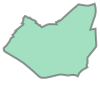

In [190]:
brgy_geo_for_city = brgy_geo.loc[brgy_geo["adm4_pcode"].str.startswith(city_initial_digits)].copy(deep = True)

city_geo = brgy_geo_for_city.union_all()
city_geo

# EDSA RTA

In [191]:
rta = pd.read_excel("provided_datasets/RTA_EDSA_2007-2016.xls")

rta.info()

*** formula/tFuncVar unknown FuncID:255
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22072 entries, 0 to 22071
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   LOCATION_TEXT          304 non-null    object        
 1   ROAD                   22072 non-null  object        
 2   WEATHER                304 non-null    object        
 3   LIGHT                  304 non-null    object        
 4   DESC                   22072 non-null  object        
 5   REPORTING_AGENCY       22072 non-null  object        
 6   MAIN_CAUSE             304 non-null    object        
 7   INCIDENTDETAILS_ID     22072 non-null  object        
 8   DATE_UTC               22072 non-null  datetime64[ns]
 9   TIME_UTC               22072 non-null  object        
 10  ADDRESS                21768 non-null  object        
 11  killed_driver          22072 non-null  int64         
 12  killed_passenger    

In [192]:
rta["DATE_UTC"].dt.year.value_counts()
# note the years are represented as np.int32 numbers

DATE_UTC
2016    5524
2015    4915
2014    3122
2012    2129
2013    2028
2011    1029
2007     928
2010     903
2009     878
2008     614
2006       2
Name: count, dtype: int64

In [193]:
rta.iloc[:3]

,LOCATION_TEXT,ROAD,WEATHER,LIGHT,DESC,REPORTING_AGENCY,MAIN_CAUSE,INCIDENTDETAILS_ID,DATE_UTC,TIME_UTC,...,injured_pedestrian,killed_uncategorized,injured_uncategorized,killed_total,injured_total,DATETIME_PST,SEVERITY,Y,X,COLLISION_TYPE
0,NaN,EDSA,NaN,NaN,"No Accident Factor, No Collision Stated (based...",MMDA Road Safety Unit,Human error,2414f311-e805-40c6-b8b9-116b51c35be7,2014-06-30,05:40:00,...,0,0,0,0,0,2014-06-30 13:40:00,Property,14.657714,121.019788,No Collision Stated
1,NaN,EDSA,NaN,NaN,"No Accident Factor, No Collision Stated (based...",MMDA Road Safety Unit,Human error,c359744e-e0e7-4541-8db8-5f334c2b4fd7,2014-03-17,01:00:00,...,0,0,0,0,0,2014-03-17 09:00:00,Property,14.657714,121.019788,No Collision Stated
2,NaN,EDSA,NaN,NaN,"No Accident Factor, No Collision Stated (based...",MMDA Road Safety Unit,Human error,84e0c352-c029-4393-9252-7516c77f471f,2013-11-26,02:00:00,...,0,0,0,0,1,2013-11-26 10:00:00,Injury,14.657714,121.019788,No Collision Stated


In [194]:
rta = gpd.GeoDataFrame(rta)
rta = rta.loc[rta["DATE_UTC"].dt.year == 2016] # NEW: filter to just the most recent year in the data (2016)

rta["point"] = gpd.points_from_xy(x = rta["X"], y = rta["Y"])
rta = rta.set_geometry("point").set_crs(epsg = assumed_crs)

rta["point"]

25        POINT (121.03334 14.6508)
45       POINT (121.00067 14.53715)
46       POINT (121.00052 14.53737)
53        POINT (120.99986 14.5374)
54       POINT (120.99578 14.53759)
                    ...            
22067    POINT (121.03714 14.64445)
22068     POINT (121.03742 14.6445)
22069    POINT (121.03711 14.64452)
22070    POINT (121.03704 14.64459)
22071     POINT (121.03707 14.6447)
Name: point, Length: 5524, dtype: geometry

In [195]:
rta_city = rta.clip(city_geo)

rta_city.shape

(958, 27)

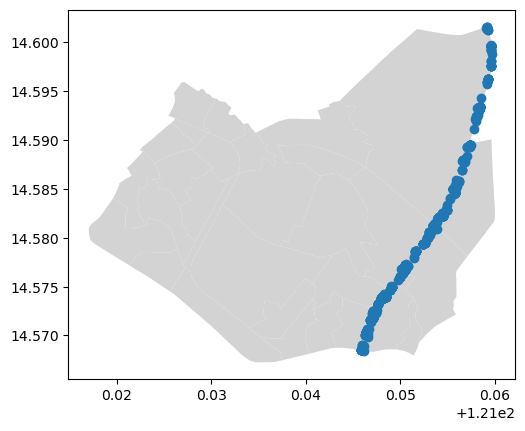

In [196]:
fig, ax = plt.subplots()

# city
brgy_geo_for_city.plot(aspect = 1, ax = ax, color = "lightgray")

# accidents
rta_city.plot(ax = ax)

plt.show()

In [197]:
Gb_edges["name"].value_counts(ascending = False)

name
Boni Avenue                         452
Shaw Boulevard                      448
EDSA                                234
Nueve de Pebrero Street             184
Reverend Gregorio Aglipay Street    170
                                   ... 
Cornell Street                        2
Alley 3                               2
V. Victorio Street                    2
Escalon Street                        2
Second Street                         2
Name: count, Length: 371, dtype: int64

In [198]:
Gb_edges.loc[Gb_edges["name"].str.contains("edsa", case = False).fillna(False), "name"].value_counts(ascending = False, dropna = False)

/var/folders/dx/zl2lgn4d3dg2zvm7jcxmbdzm0000gn/T/ipykernel_35596/2852278568.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Gb_edges.loc[Gb_edges["name"].str.contains("edsa", case = False).fillna(False), "name"].value_counts(ascending = False, dropna = False)


name
EDSA    234
Name: count, dtype: int64

In [199]:
gb_edges_edsa = Gb_edges.loc[Gb_edges["name"] == "EDSA"].copy(deep = True)

assert gb_edges_edsa.index.is_unique

gb_edges_edsa.shape

(234, 158)

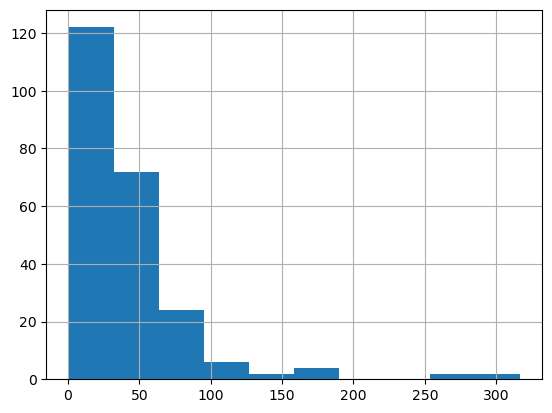

In [200]:
gb_edges_edsa["length"].hist()
plt.show()

In [201]:
longest_edsa_edges = gb_edges_edsa.sort_values("length", ascending = False).head()
longest_edsa_edges

,,,highway,lanes,lit,maxspeed,name,oneway,ref,sidewalk,surface,osmid,...,TAG_embankment,TAG_bus:lanes,TAG_survey:name,TAG_source:name:mapillary,TAG_public_transport,TAG_indoor,TAG_width:lanes,TAG_barrier:personnel,TAG_bridge:structure,geometry
u,v,key,,,,,,,,,,,,,,,,,,,,,
6539050569,1075204931,0,trunk,4,yes,60,EDSA,yes,1,None,concrete,880140124,...,None,None,None,None,None,None,None,None,None,"LINESTRING (121.0501 14.57663, 121.04839 14.57..."
1075204931,6539050569,0,trunk,4,yes,60,EDSA,yes,1,None,concrete,880140124,...,None,None,None,None,None,None,None,None,None,"LINESTRING (121.0501 14.57663, 121.04839 14.57..."
334410588,31241755,0,trunk,2,yes,60,EDSA,yes,1,separate,concrete,56672144,...,None,None,None,None,None,None,None,None,None,"LINESTRING (121.05295 14.58058, 121.05154 14.5..."
31241755,334410588,0,trunk,2,yes,60,EDSA,yes,1,separate,concrete,56672144,...,None,None,None,None,None,None,None,None,None,"LINESTRING (121.05295 14.58058, 121.05154 14.5..."
88901997,7192545200,0,trunk,4,yes,60,EDSA,yes,1,None,None,642184727,...,None,None,None,None,None,None,None,None,None,"LINESTRING (121.04895 14.57463, 121.04993 14.5..."


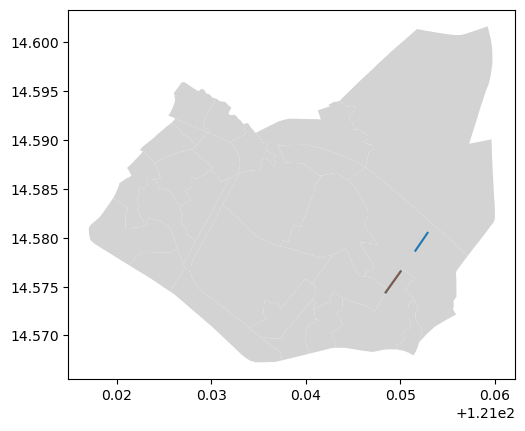

In [202]:
# plot the longest edges. theyre a problem

fig, ax = plt.subplots()

# city
brgy_geo_for_city.plot(aspect = 1, ax = ax, color = "lightgray")

df = longest_edsa_edges.iloc[0:3]
df.plot(df.index.to_series(), ax = ax)

# ax.set_xlim(1.21e2 + 0.04, 1.21e2 + 0.06)
# ax.set_ylim(14.572, 14.587)

plt.show()

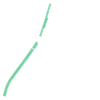

In [203]:
gb_edges_edsa_all = gb_edges_edsa.union_all()
gb_edges_edsa_all

In [204]:
gb_nodes_edsa = Gb_nodes.loc[Gb_nodes.covered_by(gb_edges_edsa_all)].copy(deep = True)

gb_nodes_edsa.shape

(123, 90)

In [205]:
gb_nodes_edsa.index.is_unique

True

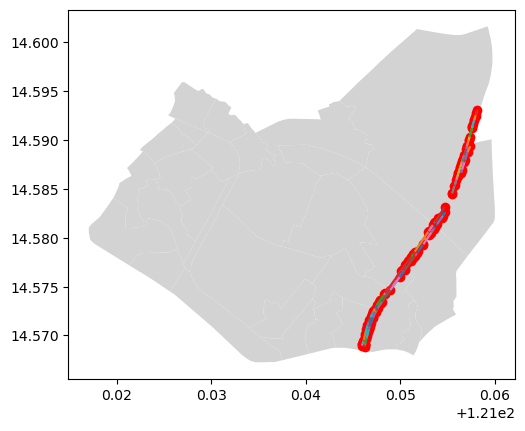

In [206]:
fig, ax = plt.subplots()

# city
brgy_geo_for_city.plot(aspect = 1, ax = ax, color = "lightgray")

# edges
gb_edges_edsa.plot(gb_edges_edsa.index.to_series(), ax = ax)

# nodes
gb_nodes_edsa.plot(
    # gb_nodes_edsa.index.to_series(),
    ax = ax, color = "red")

plt.show()

In [207]:
assert rta_city["INCIDENTDETAILS_ID"].is_unique
# this shows this feature is unique for every incident

In [208]:
# # REMOVED. should not use osmid as unique identifier.
# gb_edges_edsa["osmid_for_grouping"] = gb_edges_edsa["osmid"].apply(lambda x: tuple(x) if isinstance(x, list) else x)

In [209]:
df1 = rta_city.sjoin_nearest(gb_edges_edsa, how = "left", distance_col = "point_dist_from_edge").reset_index(drop = True)
df1["INCIDENTDETAILS_ID"].is_unique

/Users/migs/opt/anaconda3/envs/osmnx_env2b/lib/python3.13/site-packages/geopandas/array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


False

In [210]:
# since above is false, some accident points found multiple edges with the same distance away from themselves.
df1["INCIDENTDETAILS_ID"].value_counts(ascending = False)

INCIDENTDETAILS_ID
36c87ffd-0a23-491d-bcd5-453892048a54    2
ee9f4e2f-2c4f-4e22-a2a9-2ad47750270c    2
4f21807d-514f-4c56-a8df-6344a9691020    2
d6a3bace-5da6-492d-8c79-f67028a2ba6a    2
460bbe97-2184-49b6-a431-d670f234038a    2
                                       ..
b85575cf-67b2-4e64-a0c5-747b09033d9e    2
5fc25d31-324e-4739-877f-2586a7d67388    2
1b300f4f-6be3-42ff-b815-b5396448a6ae    2
9a415c52-e8cc-47f6-b06e-6944cfd3bf7e    2
9a3c35bc-3f1f-4427-a295-1018a1d85cec    2
Name: count, Length: 958, dtype: int64

In [211]:
df1.columns[:30]

Index(['LOCATION_TEXT', 'ROAD', 'WEATHER', 'LIGHT', 'DESC', 'REPORTING_AGENCY',
       'MAIN_CAUSE', 'INCIDENTDETAILS_ID', 'DATE_UTC', 'TIME_UTC', 'ADDRESS',
       'killed_driver', 'killed_passenger', 'killed_pedestrian',
       'injured_driver', 'injured_passenger', 'injured_pedestrian',
       'killed_uncategorized', 'injured_uncategorized', 'killed_total',
       'injured_total', 'DATETIME_PST', 'SEVERITY', 'Y', 'X', 'COLLISION_TYPE',
       'point', 'u', 'v', 'key'],
      dtype='object')

In [212]:
# given the number of duplicate edges for a given accident is k, just let the weights of "accidents" attributed to each of the duplicate edges be (1/k).
freq_reference = df1["INCIDENTDETAILS_ID"].value_counts()
freqs = df1["INCIDENTDETAILS_ID"].apply(lambda k: freq_reference[k])
df1["EDSA_accidents"] = 1 
df1["EDSA_accidents"] = df1["EDSA_accidents"].mask(freqs > 1, (1/freqs) * df1["EDSA_accidents"])

df1["EDSA_accidents"].value_counts()

EDSA_accidents
0.5    1916
Name: count, dtype: int64

In [213]:
rta_nearest_edges = gb_edges_edsa[["geometry"]].merge(df1, how = "left", left_index = True, right_on = ["u", "v", "key"])

rta_nearest_edges["line_between"] = rta_nearest_edges["point"].shortest_line(rta_nearest_edges["geometry"])

rta_nearest_edges.head(2)

,geometry,LOCATION_TEXT,ROAD,WEATHER,LIGHT,DESC,REPORTING_AGENCY,MAIN_CAUSE,INCIDENTDETAILS_ID,DATE_UTC,...,TAG_survey:name,TAG_source:name:mapillary,TAG_public_transport,TAG_indoor,TAG_width:lanes,TAG_barrier:personnel,TAG_bridge:structure,point_dist_from_edge,EDSA_accidents,line_between
1741,"LINESTRING (121.04895 14.57463, 121.04993 14.5...",NaN,EDSA,NaN,NaN,"No Accident Factor, No Collision Stated (based...",MMDA Road Safety Unit,NaN,d0634adf-7054-47ba-94b2-66bd5908af84,2016-10-06,...,None,None,None,None,None,None,None,0.000039,0.5,"LINESTRING (121.04915 14.57497, 121.04918 14.5..."
1743,"LINESTRING (121.04895 14.57463, 121.04993 14.5...",NaN,EDSA,NaN,NaN,"No Accident Factor, No Collision Stated (based...",MMDA Road Safety Unit,NaN,c9bfd95e-b586-49cf-a4a5-76c5acf43db8,2016-01-20,...,None,None,None,None,None,None,None,0.000039,0.5,"LINESTRING (121.04915 14.57497, 121.04918 14.5..."


In [214]:
rta_nearest_edges["INCIDENTDETAILS_ID"].value_counts(ascending = False)
# check this again to make sure result is the same as before

INCIDENTDETAILS_ID
d0634adf-7054-47ba-94b2-66bd5908af84    2
8777ca43-fb7c-444b-88ec-7ff35fc47f32    2
bad4464a-8a37-497d-90ee-1abfd7123167    2
91ce53f3-2db7-40a9-b1cc-ddcfd28abff3    2
88209116-504a-46f7-946c-10b3bd21a353    2
                                       ..
cbd26c17-b2ad-476d-80bf-bbbe06582bec    2
b2b84e18-dc5d-4832-bdbd-960ac3b6b28c    2
81ce2f41-dc41-453d-8fc0-cefbe54e9c91    2
5d47f32a-3a61-4fba-b531-e61239374525    2
3f2bfe03-2d6a-4a54-88ab-f9dd809e2d82    2
Name: count, Length: 958, dtype: int64

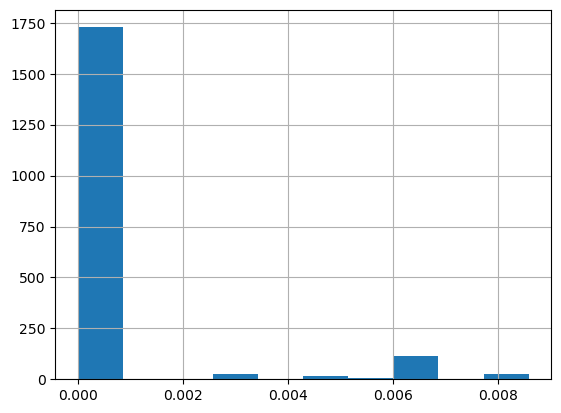

In [215]:
rta_nearest_edges["point_dist_from_edge"].hist()
plt.show()

In [216]:
worst_matches_df = rta_nearest_edges.sort_values("point_dist_from_edge", ascending = False)
worst_matches_df = worst_matches_df.loc[worst_matches_df["point_dist_from_edge"] > 0.00025]
worst_matches_df = worst_matches_df.set_geometry("line_between").set_crs(epsg = assumed_crs)

worst_matches_df.shape

(332, 191)

/var/folders/dx/zl2lgn4d3dg2zvm7jcxmbdzm0000gn/T/ipykernel_35596/4203458514.py:10: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  worst_matches_df.set_geometry("line_between").set_crs(epsg = assumed_crs).plot("INCIDENTDETAILS_ID", ax = ax, color = "black")


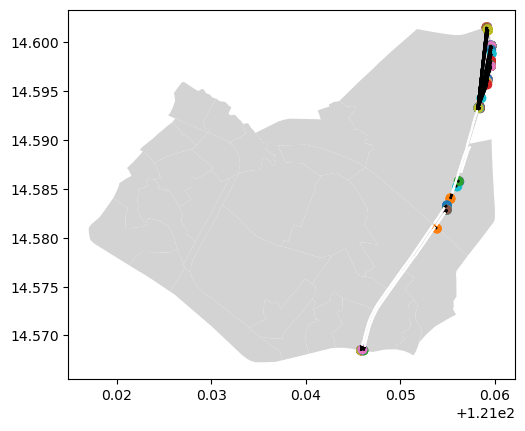

In [217]:
fig, ax = plt.subplots()

# city
brgy_geo_for_city.plot(aspect = 1, ax = ax, color = "lightgray")

# original points of accidents
worst_matches_df.set_geometry("point").set_crs(epsg = assumed_crs).plot("INCIDENTDETAILS_ID", ax = ax)

# lines between the original points and their matched nodes
worst_matches_df.set_geometry("line_between").set_crs(epsg = assumed_crs).plot("INCIDENTDETAILS_ID", ax = ax, color = "black")

# actual edges of EDSA
gb_edges_edsa.plot(ax = ax, color = "white")

plt.show()

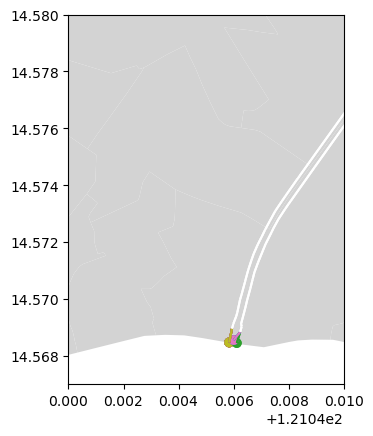

In [218]:
fig, ax = plt.subplots()

# city
brgy_geo_for_city.plot(aspect = 1, ax = ax, color = "lightgray")

# original points of accidents
worst_matches_df.set_geometry("point").set_crs(epsg = assumed_crs).plot("INCIDENTDETAILS_ID", ax = ax)

# lines between the original points and their matched nodes
worst_matches_df.set_geometry("line_between").set_crs(epsg = assumed_crs).plot("INCIDENTDETAILS_ID", ax = ax)

# actual edges of EDSA
gb_edges_edsa.plot(ax = ax, color = "white")

ax.set_xlim(1.210e2 + 0.04, 1.210e2 + 0.05)
ax.set_ylim(14.567, 14.580)

plt.show()

In [219]:
# The distance is barely anything so I think it's fine.

In [220]:
rta_nearest_edges["EDSA_accidents"] = rta_nearest_edges["EDSA_accidents"].fillna(0)
accidents_per_edge = rta_nearest_edges[["u", "v", "key", "EDSA_accidents"]].groupby(["u", "v", "key"]).sum().round()
accidents_per_edge.sort_values("EDSA_accidents", ascending = False)

,,,EDSA_accidents
u,v,key,
321554358,1347624257,0,84.0
1347624257,321554358,0,84.0
5821774513,8595216694,0,62.0
8595216694,5821774513,0,62.0
7475238724,331134097,0,28.0
...,...,...,...
5286257621,6353472856,0,0.0
5286755082,8462613410,0,0.0
5288983033,5289211745,0,0.0


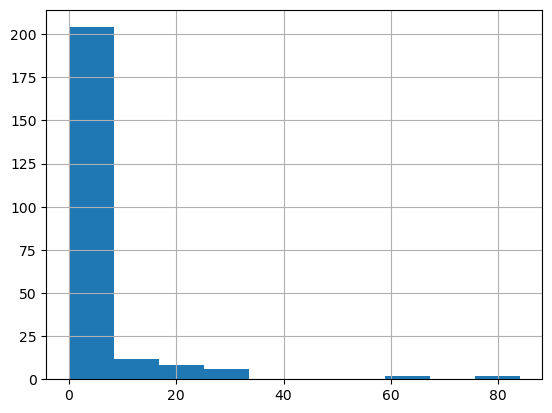

In [221]:
accidents_per_edge["EDSA_accidents"].hist()
plt.show()

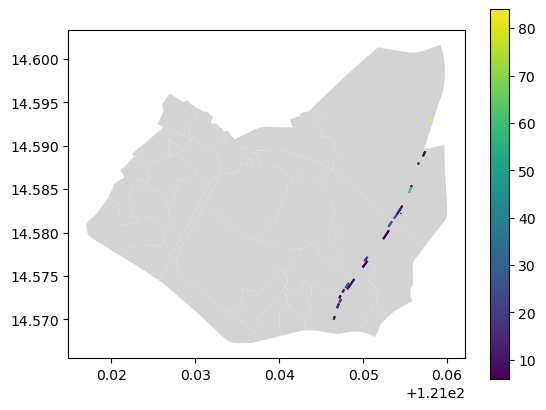

In [222]:
fig, ax = plt.subplots()

# city
brgy_geo_for_city.plot(aspect = 1, ax = ax, color = "lightgray")

df = gpd.GeoDataFrame(accidents_per_edge).merge(gb_edges_edsa, left_index = True, right_index = True).set_geometry("geometry").set_crs(epsg = assumed_crs)

# limiting to high values so i can see that there are differences
df = df.loc[df["EDSA_accidents"] > 5]

df.plot("EDSA_accidents", legend = True, ax = ax)
plt.show()

In [223]:
assert accidents_per_edge.shape[0] == gb_edges_edsa.shape[0]
gb_edges_edsa.shape[0]

234

## merge

In [224]:
accidents_per_edge

EDSA_accidents
u           v           key                
12067613    8595216694  0               2.0
12067619    1276924654  0              12.0
12067627    5289211747  0               0.0
            5289211749  0               2.0
24080775    5289002838  0               0.0
...                                     ...
11969454183 11969229995 0               0.0
12087698577 24080775    0              12.0
            1663866326  0               2.0
12144909220 5289002933  0               0.0
            5289002939  0               0.0

[234 rows x 1 columns]

In [225]:
gb_edges_with_accidents = Gb_edges.merge(accidents_per_edge, how = "left", left_index = True, right_index = True)

gb_edges_with_accidents.columns

Index(['highway', 'lanes', 'lit', 'maxspeed', 'name', 'oneway', 'ref',
       'sidewalk', 'surface', 'osmid',
       ...
       'TAG_bus:lanes', 'TAG_survey:name', 'TAG_source:name:mapillary',
       'TAG_public_transport', 'TAG_indoor', 'TAG_width:lanes',
       'TAG_barrier:personnel', 'TAG_bridge:structure', 'geometry',
       'EDSA_accidents'],
      dtype='object', length=159)

In [226]:
Gb_edges.shape, gb_edges_with_accidents.shape

((14878, 158), (14878, 159))

In [227]:
gw_edges_with_accidents = Gw_edges.merge(accidents_per_edge, how = "left", left_index = True, right_index = True)

gw_edges_with_accidents.columns

Index(['highway', 'lanes', 'lit', 'maxspeed', 'name', 'oneway', 'ref',
       'sidewalk', 'surface', 'osmid',
       ...
       'TAG_bus:lanes', 'TAG_survey:name', 'TAG_source:name:mapillary',
       'TAG_public_transport', 'TAG_indoor', 'TAG_width:lanes',
       'TAG_barrier:personnel', 'TAG_bridge:structure', 'geometry',
       'EDSA_accidents'],
      dtype='object', length=159)

In [228]:
Gw_edges.shape, gw_edges_with_accidents.shape

((15332, 158), (15332, 159))

# High res pop density

In [229]:
pop = pd.read_csv("external_datasets/phl_general_2020 (high res population data).csv")

pop.head()

,longitude,latitude,phl_general_2020
0,121.853194,20.827639,1.917133
1,121.853472,20.827639,1.917133
2,121.837917,20.825417,1.917133
3,121.838194,20.825417,1.917133
4,121.854583,20.815139,1.917133


In [230]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10110681 entries, 0 to 10110680
Data columns (total 3 columns):
 #   Column            Dtype  
---  ------            -----  
 0   longitude         float64
 1   latitude          float64
 2   phl_general_2020  float64
dtypes: float64(3)
memory usage: 231.4 MB


In [231]:
pop = gpd.GeoDataFrame(pop)
pop["point"] = gpd.points_from_xy(x = pop["longitude"], y = pop["latitude"])
pop = pop.rename({"phl_general_2020": "META_population_density_2020"}, axis = 1)
pop = pop.set_geometry("point").set_crs(epsg = assumed_crs)
# dataset has 10 million entries so do not plot yet

In [232]:
pop_city = pop.clip(city_geo)

pop_city.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 10144 entries, 3315007 to 3279500
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   longitude                     10144 non-null  float64 
 1   latitude                      10144 non-null  float64 
 2   META_population_density_2020  10144 non-null  float64 
 3   point                         10144 non-null  geometry
dtypes: float64(3), geometry(1)
memory usage: 396.2 KB


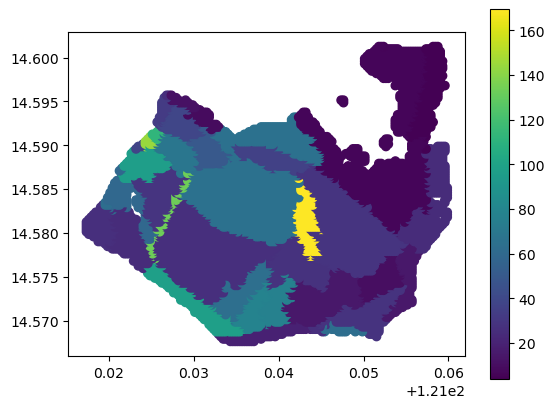

In [233]:
pop_city.plot("META_population_density_2020", legend = True)
plt.show()

In [234]:
pop_city

,longitude,latitude,META_population_density_2020,point
3315007,121.033472,14.567917,19.150173,POINT (121.03347 14.56792)
3314407,121.039583,14.568194,19.150173,POINT (121.03958 14.56819)
3313792,121.039861,14.568472,19.150173,POINT (121.03986 14.56847)
3313791,121.039583,14.568472,19.150173,POINT (121.03958 14.56847)
3313794,121.040417,14.568472,19.150173,POINT (121.04042 14.56847)
...,...,...,...,...
3280927,121.018194,14.581528,26.216212,POINT (121.01819 14.58153)
3280926,121.017917,14.581528,26.216212,POINT (121.01792 14.58153)
3280203,121.017917,14.581806,26.216212,POINT (121.01792 14.58181)
3280204,121.018194,14.581806,26.216212,POINT (121.01819 14.58181)


## merge

In [235]:
Gb_nodes_w_brgycode_popdensity = gb_nodes_with_brgy_code.sjoin_nearest(
    pop_city[["META_population_density_2020", "point"]], how = "left", distance_col = "distance_from_node"
).drop("index_right", axis = 1) # Byproduct of sjoin

Gb_nodes_w_brgycode_popdensity.sort_values("distance_from_node", ascending = False).head()

/Users/migs/opt/anaconda3/envs/osmnx_env2b/lib/python3.13/site-packages/geopandas/array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


,visible,changeset,x,y,version,timestamp,tags,HAS_TAG,TAG_access,TAG_barrier,...,TAG_fee,TAG_traffic_calming:direction,TAG_motor_vehicle,TAG_description,TAG_layer,geometry,CCHAIN_adm4_pcode,CCHAIN_adm4_en,META_population_density_2020,distance_from_node
osmid,,,,,,,,,,,,,,,,,,,,,
12205481156,False,0,121.059975,14.583007,1,1727458987,"{ ""highway"": ""crossing"" }",True,None,None,...,None,None,None,None,None,POINT (121.05997 14.58301),PH137401027,Wack-wack Greenhills,24.604451,0.000608
5472136474,False,0,121.056000,14.573092,4,1709200266,None,False,None,None,...,None,None,None,None,None,POINT (121.056 14.57309),NaN,NaN,14.499832,0.000592
1495557422,False,0,121.059967,14.583037,4,1529862399,None,False,None,None,...,None,None,None,None,None,POINT (121.05997 14.58304),PH137401027,Wack-wack Greenhills,24.604451,0.000580
12205481157,False,0,121.059883,14.583009,1,1727458987,None,False,None,None,...,None,None,None,None,None,POINT (121.05988 14.58301),PH137401027,Wack-wack Greenhills,24.604451,0.000552
10698895972,False,0,121.059967,14.583093,1,1677572476,None,False,None,None,...,None,None,None,None,None,POINT (121.05997 14.58309),PH137401027,Wack-wack Greenhills,24.604451,0.000540


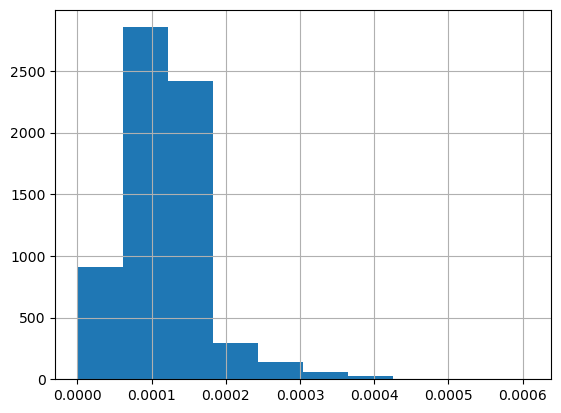

In [236]:
Gb_nodes_w_brgycode_popdensity["distance_from_node"].hist()
plt.show()

In [237]:
# about the above: as we saw earlier, a distance of 0.0007 isn't that much. So im not concerned about this.


In [238]:
# repeat for walk graph

In [239]:
Gw_nodes_w_brgycode_popdensity = gw_nodes_with_brgy_code.sjoin_nearest(
    pop_city[["point", "META_population_density_2020"]], how = "left", distance_col = "distance_from_node"
).drop("index_right", axis = 1) # Byproduct of sjoin

Gw_nodes_w_brgycode_popdensity.sort_values("distance_from_node", ascending = False).head()

/Users/migs/opt/anaconda3/envs/osmnx_env2b/lib/python3.13/site-packages/geopandas/array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


,visible,changeset,x,y,version,timestamp,tags,HAS_TAG,TAG_access,TAG_barrier,...,TAG_traffic_calming:direction,TAG_railway,TAG_motor_vehicle,TAG_description,TAG_layer,geometry,CCHAIN_adm4_pcode,CCHAIN_adm4_en,META_population_density_2020,distance_from_node
osmid,,,,,,,,,,,,,,,,,,,,,
12205481156,False,0,121.059975,14.583007,1,1727458987,"{ ""highway"": ""crossing"" }",True,None,None,...,None,None,None,None,None,POINT (121.05997 14.58301),PH137401027,Wack-wack Greenhills,24.604451,0.000608
5472136474,False,0,121.056000,14.573092,4,1709200266,None,False,None,None,...,None,None,None,None,None,POINT (121.056 14.57309),NaN,NaN,14.499832,0.000592
1495557422,False,0,121.059967,14.583037,4,1529862399,None,False,None,None,...,None,None,None,None,None,POINT (121.05997 14.58304),PH137401027,Wack-wack Greenhills,24.604451,0.000580
12205481157,False,0,121.059883,14.583009,1,1727458987,None,False,None,None,...,None,None,None,None,None,POINT (121.05988 14.58301),PH137401027,Wack-wack Greenhills,24.604451,0.000552
10698895972,False,0,121.059967,14.583093,1,1677572476,None,False,None,None,...,None,None,None,None,None,POINT (121.05997 14.58309),PH137401027,Wack-wack Greenhills,24.604451,0.000540


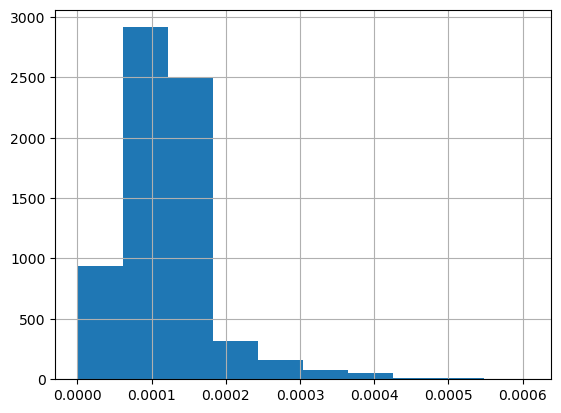

In [240]:
Gw_nodes_w_brgycode_popdensity["distance_from_node"].hist()
plt.show()

In [241]:
# remove since not needed anymore when saving
Gb_nodes_w_brgycode_popdensity = Gb_nodes_w_brgycode_popdensity.drop("distance_from_node", axis = 1)
Gb_nodes_w_brgycode_popdensity.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 6712 entries, 321734921 to 6773491495
Data columns (total 93 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   visible                        6712 non-null   bool          
 1   changeset                      6712 non-null   int32         
 2   x                              6712 non-null   float64       
 3   y                              6712 non-null   float64       
 4   version                        6712 non-null   int32         
 5   timestamp                      6712 non-null   int32         
 6   tags                           1215 non-null   object        
 7   HAS_TAG                        6712 non-null   object        
 8   TAG_access                     440 non-null    object        
 9   TAG_barrier                    477 non-null    object        
 10  TAG_crossing                   430 non-null    object        
 11  

In [242]:
# remove since not needed anymore when saving
Gw_nodes_w_brgycode_popdensity = Gw_nodes_w_brgycode_popdensity.drop("distance_from_node", axis = 1)
Gw_nodes_w_brgycode_popdensity.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 6957 entries, 321734921 to 6773491495
Data columns (total 94 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   visible                        6957 non-null   bool          
 1   changeset                      6957 non-null   int32         
 2   x                              6957 non-null   float64       
 3   y                              6957 non-null   float64       
 4   version                        6957 non-null   int32         
 5   timestamp                      6957 non-null   int32         
 6   tags                           1229 non-null   object        
 7   HAS_TAG                        6957 non-null   object        
 8   TAG_access                     457 non-null    object        
 9   TAG_barrier                    494 non-null    object        
 10  TAG_crossing                   425 non-null    object        
 11  

# SAVE

In [243]:
folder = "01_outputs/"

gb_edges_with_accidents.to_file(folder + "geofabrik_bike_graph_edges_w_EDSAaccidents.geojson", driver = "GeoJSON")
Gb_nodes_w_brgycode_popdensity.to_file(folder + "geofabrik_bike_graph_nodes_w_brgycode_popdensity.geojson", driver = "GeoJSON")
gw_edges_with_accidents.to_file(folder + "geofabrik_walk_graph_edges_w_EDSAaccidents.geojson", driver = "GeoJSON")
Gw_nodes_w_brgycode_popdensity.to_file(folder + "geofabrik_walk_graph_nodes_w_brgycode_popdensity.geojson", driver = "GeoJSON")

In [244]:
# save cchain filtered

In [245]:
cchain_filtered.keys()

dict_keys(['osm_poi_amenity.csv', 'osm_poi_health.csv', 'project_noah_hazards.csv', 'tm_open_buildings.csv', 'google_open_buildings.csv', 'climate_air_quality.csv', 'brgy_geography.csv'])

In [246]:
folder = "01_outputs/"

for dset_name, dset in cchain_filtered.items():

    if dset_name in ("tm_open_buildings.csv", "brgy_geography.csv"):
        dset = gpd.GeoDataFrame(dset)
        dset["geometry"] = gpd.GeoSeries.from_wkt(dset["geometry"])
        dset = dset.set_geometry("geometry").set_crs(epsg = assumed_crs)
        dset_name_final = f"CCHAIN_FILTERED_{dset_name}".replace(".csv", ".geojson")
        dset.to_file(folder + dset_name_final)
    else:
        dset_name_final = f"CCHAIN_FILTERED_{dset_name}"
        dset.to_csv(folder + dset_name_final, index = False)